<h1> KPIs (Key Performance Indicator) </h1>

<h2> Primer KPI: "Incremento del 2%" </h2>

#### Este KPI aumenta en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.
#### Donde:
- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

In [106]:
# Importamos todas las bibliotecas necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Carga del archivo:
df_combinado = pd.read_csv(r"df_combinado.csv")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           936 non-null    int64 
 1   Trimestre                     936 non-null    int64 
 2   Provincia                     936 non-null    object
 3   ADSL                          936 non-null    int64 
 4   Cablemodem                    936 non-null    int64 
 5   Fibra óptica                  936 non-null    int64 
 6   Wireless                      936 non-null    int64 
 7   Otros                         936 non-null    int64 
 8   Total_conexion                936 non-null    int64 
 9   Accesos por cada 100 hab      936 non-null    int64 
 10  Accesos por cada 100 hogares  936 non-null    int64 
 11  Banda ancha fija              936 non-null    int64 
 12  Dial up                       936 non-null    int64 
 13  Hasta 512 kbps      

In [108]:
# Vamos a definir un dataframe nuevo asi podemos trabajar con comodidad: 
df_kpi_inc = df_combinado[['Año', 'Trimestre', 'Provincia']]

df_kpi_inc['acceso_actual'] = df_combinado['Accesos por cada 100 hogares']

C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\2442971157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_inc['acceso_actual'] = df_combinado['Accesos por cada 100 hogares']


In [109]:

# Ordenamos por Provincia, Año y Trimestre
df_kpi_inc = df_kpi_inc.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Definimos nuevo_acceso dentro de cada grupo de provincia
df_kpi_inc['nuevo_acceso'] = df_kpi_inc.groupby('Provincia')['acceso_actual'].shift(-1)

# Calculamos el KPI por provincia
df_kpi_inc['KPI'] = ((df_kpi_inc['nuevo_acceso'] - df_kpi_inc['acceso_actual']) / df_kpi_inc['acceso_actual']) * 100

# Redondeamos los valores de KPI a dos decimales
df_kpi_inc['KPI'] = df_kpi_inc['KPI'].round(2)

# Eliminamos filas con NaN en nuevo_acceso si es necesario
df_kpi_inc.dropna(subset=['nuevo_acceso'], inplace=True)

# Mostramos el resultado final
df_kpi_inc.head()

,Año,Trimestre,Provincia,acceso_actual,nuevo_acceso,KPI
912,2014,1,Buenos Aires,54,55.0,1.85
888,2014,2,Buenos Aires,55,56.0,1.82
864,2014,3,Buenos Aires,56,56.0,0.00
840,2014,4,Buenos Aires,56,56.0,0.00
816,2015,1,Buenos Aires,56,56.0,0.00


In [110]:
# Vamos a realizar una funcion que si por parametro escribimos una provincia, nos devolvera un grafico el cual tiene todos los años con sus respectivos trimestres y el valor de KPI que tienen.
def grafico_kpi_por_provincia(provincia):
    global df_kpi_inc  # Usar el dataframe global
    
    # Filtramos el dataframe por la provincia especificada
    df_provincia = df_kpi_inc[df_kpi_inc['Provincia'] == provincia]
    
    # Ordenamos por Año y Trimestre
    df_provincia = df_provincia.sort_values(by=['Año', 'Trimestre'])
    
    # Calculamos el KPI por trimestre
    df_provincia['KPI'] = ((df_provincia['nuevo_acceso'] - df_provincia['acceso_actual']) / df_provincia['acceso_actual']) * 100
    df_provincia['KPI'] = df_provincia['KPI'].round(2)
    
    # Definimos colores y paleta
    colores_trimestres = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    sns.set_palette(sns.color_palette('Set2'))
    
    # Graficamos el KPI por trimestre con barras y línea del 2%
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Año', y='KPI', hue='Trimestre', data=df_provincia, palette=colores_trimestres)
    
    # Estilo y ajustes
    plt.title(f'KPI por Trimestre para {provincia}', fontsize=18)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('KPI (%)', fontsize=14)
    plt.axhline(y=2, color='gray', linestyle='--', linewidth=2, alpha=0.6)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.legend(title='Trimestre', title_fontsize='14', fontsize='12', loc='upper left')
    
    # Ajustes de la leyenda fuera del gráfico
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Ajustar diseño general
    sns.despine(trim=True)
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

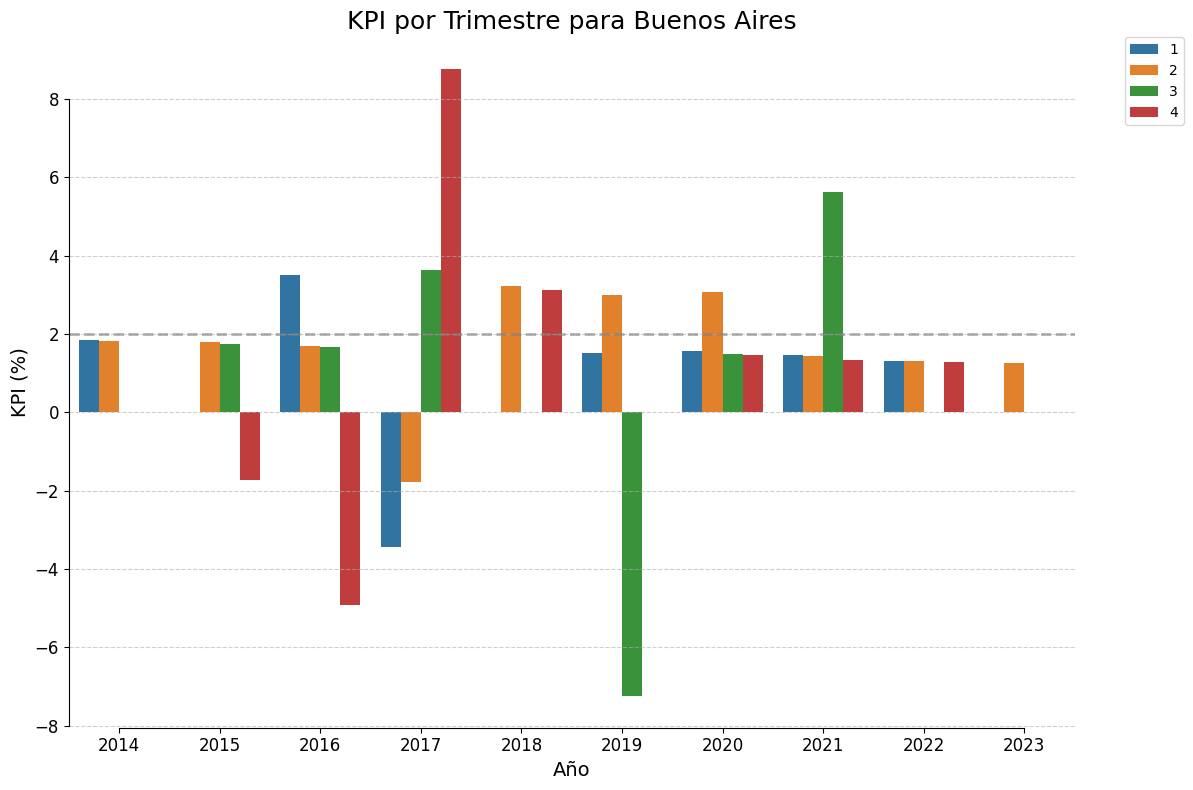

In [111]:
grafico_kpi_por_provincia('Buenos Aires')

In [112]:
# Vamos a exportar el df_kpi_incremento para trabajar un script mas adelante:
##df_kpi_inc.to_csv('df_kpi_inc.csv', index=False)

<h2> Segundo KPI: " Crecimiento del Internet" </h2>

#### Este KPI nos proporcionará una visión clara del crecimiento en el acceso a internet en cada provincia a lo largo del tiempo, permitiéndote identificar áreas que están mejorando y aquellas que pueden necesitar más atención.

In [115]:
# Este df contiene las columnas: 'Año', 'Trimestre', 'Provincia', 'Acceso a Internet', 'Megas Consumidos'
df_kpi_megas = df_combinado[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab', 'Total suma Mbps']]

# Ordenamos el DataFrame por provincia, año y trimestre
df_kpi_megas.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Calculamos el crecimiento del acceso a internet
df_kpi_megas['CrecimientoAcceso'] = df_kpi_megas.groupby('Provincia')['Accesos por cada 100 hab'].pct_change() * 100

# Redondeamos 'CrecimientoAcceso' a 2 decimales
df_kpi_megas['CrecimientoAcceso'] = df_kpi_megas['CrecimientoAcceso'].round(2)

# Ordenamos el DataFrame por la variación trimestral de consumo de datos de forma descendente
df_kpi_megas = df_kpi_megas.sort_values(by=['Provincia', 'Año'], ascending=False)

#Podemos observar que hay valores faltantes, por lo tanto vamos a actuar poniendo un valor 0 asi no decidimos un aumento o un desenso en el crecimiento del internet. 
df_kpi_megas.fillna(0, inplace=True)

# Mostramos los resultados
df_kpi_megas.head()

C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1911223032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_megas.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1911223032.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_megas['CrecimientoAcceso'] = df_kpi_megas.groupby('Provincia')['Accesos por cada 100 hab'].pct_change() * 100
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1911223032.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Total suma Mbps,CrecimientoAcceso
71,2023,1,Tucumán,14,261100,-6.67
47,2023,2,Tucumán,15,263602,7.14
23,2023,3,Tucumán,15,266557,0.00
167,2022,1,Tucumán,14,245584,7.69
143,2022,2,Tucumán,14,254527,0.00


In [116]:
# Creamos una función para generar el gráfico del crecimiento de acceso a internet por provincia
def graficar_crecimiento_acceso(provincia):
    df_provincia = df_kpi_megas[df_kpi_megas['Provincia'] == provincia]
    
    if df_provincia.empty:
        print(f"No se encontraron datos para la provincia: {provincia}")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_provincia['Año'].astype(str) + '-T' + df_provincia['Trimestre'].astype(str), 
             df_provincia['CrecimientoAcceso'], marker='o')
    
    plt.title(f'Crecimiento del Acceso a Internet en {provincia}')
    plt.xlabel('Tiempo (Año-Trimestre)')
    plt.ylabel('Crecimiento del Acceso (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

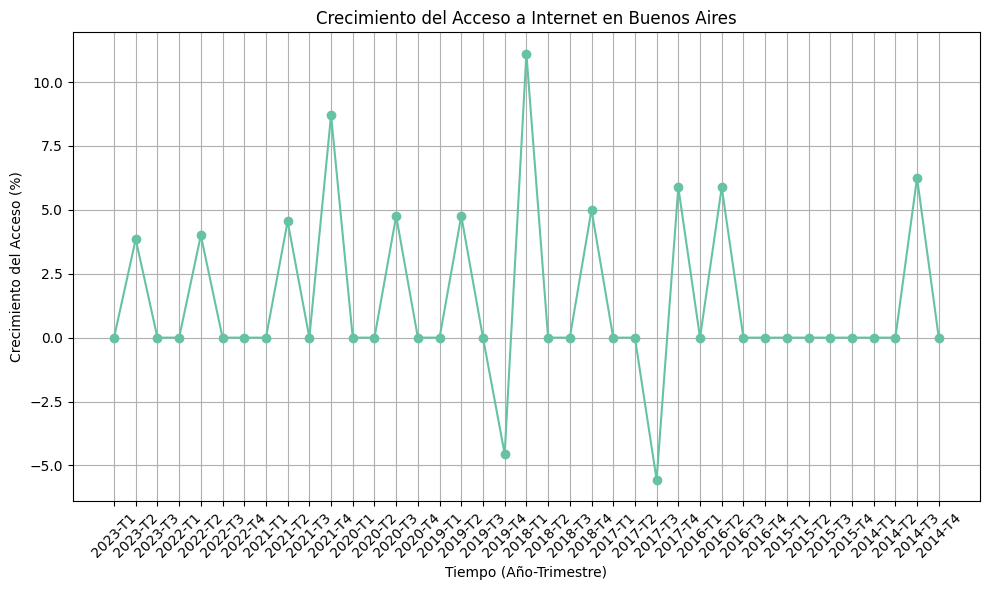

In [117]:
graficar_crecimiento_acceso('Buenos Aires')

C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\3858542528.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_provincia['Periodo'] = df_provincia['Año'].astype(str) + '-T' + df_provincia['Trimestre'].astype(str)


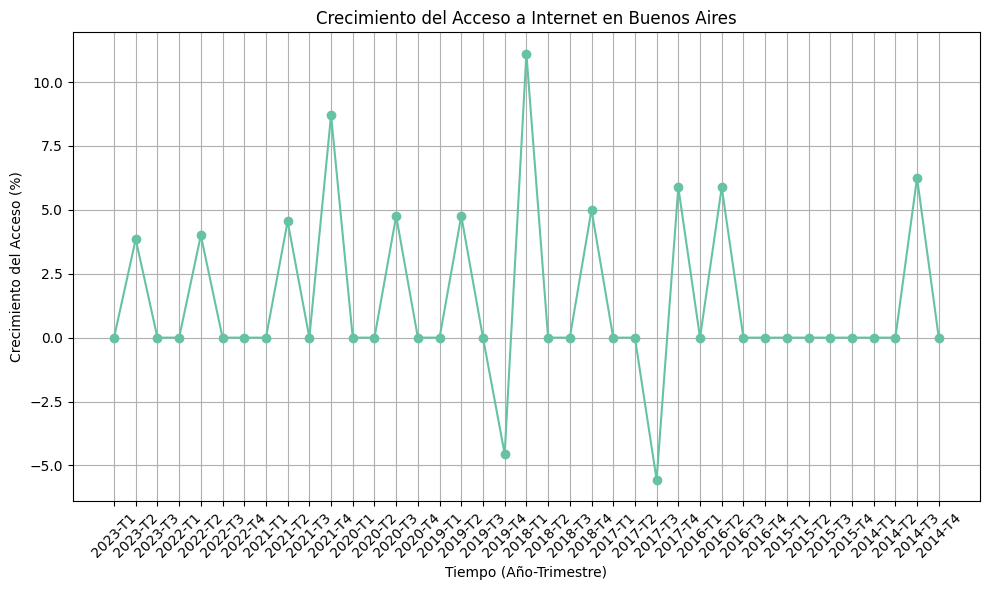

In [118]:

# Filtrar por provincia (reemplaza 'provincia_elegida' con el nombre de la provincia deseada)
provincia = 'Buenos Aires'
df_provincia = df_kpi_megas[df_kpi_megas['Provincia'] == provincia]

# Verificar si se encontraron datos para la provincia
if df_provincia.empty:
    print(f"No se encontraron datos para la provincia: {provincia}")
else:
    # Convertir año y trimestre a formato adecuado para etiquetas de tiempo
    df_provincia['Periodo'] = df_provincia['Año'].astype(str) + '-T' + df_provincia['Trimestre'].astype(str)

    # Graficar el crecimiento del acceso a internet
    plt.figure(figsize=(10, 6))
    plt.plot(df_provincia['Periodo'], df_provincia['CrecimientoAcceso'], marker='o')
    
    # Ajustar título y etiquetas de ejes
    plt.title(f'Crecimiento del Acceso a Internet en {provincia}')
    plt.xlabel('Tiempo (Año-Trimestre)')
    plt.ylabel('Crecimiento del Acceso (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico en Power BI
    plt.show()

In [120]:
# Vamos a exportar el df_kpi_megas para trabajar un script mas adelante:
## df_kpi_megas.to_csv('df_kpi_megas.csv', index=False)

<h2> Tercer KPI: " Aumento Trimestral de Ingresos en Miles(pesos) en toda la Nacion" </h2>

#### Definición del KPI:
- El KPI que hemos calculado es el "Aumento Trimestral de Ingresos". Este indicador mide la variación en los ingresos de los accesoso a internet de un trimestre a otro a lo largo del tiempo.
#### Cálculo del KPI:
- Para calcular este KPI, utilizamos los datos de ingresos (expresados en miles de pesos) para cada trimestre.
- Restamos los ingresos del trimestre actual con los ingresos del trimestre anterior para obtener el aumento absoluto de ingresos para cada par de trimestres consecutivos.

In [ ]:
df_nacional = pd.read_csv(r'df_nacional.csv')
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        38 non-null     int64  
 1   Trimestre                  38 non-null     int64  
 2   Banda ancha fija           38 non-null     int64  
 3   Dial up                    38 non-null     int64  
 4   Mbps (Media de bajada)     38 non-null     float64
 5   Hasta 512 kbps             38 non-null     float64
 6   Entre 512 Kbps y 1 Mbps    38 non-null     float64
 7   Entre 1 Mbps y 6 Mbps      38 non-null     float64
 8   Entre 6 Mbps y 10 Mbps     38 non-null     float64
 9   Entre 10 Mbps y 20 Mbps    38 non-null     float64
 10  Entre 20 Mbps y 30 Mbps    38 non-null     float64
 11  Más de 30 Mbps             38 non-null     float64
 12  Otros Mbps                 38 non-null     float64
 13  Ingresos (miles de pesos)  38 non-null     float64
 

In [ ]:
# Vamos a definir un dataframe nuevo asi podemos trabajar con comodidad: 
df_kpi_ingresos = df_nacional[['Año', 'Trimestre', 'Ingresos (miles de pesos)']]
df_kpi_ingresos.head(3)

,Año,Trimestre,Ingresos (miles de pesos)
0,2023,3,1.331066e+08
1,2023,2,1.180603e+08
2,2022,4,7.244348e+07


In [ ]:
# Ordenar el DataFrame por año y trimestre para asegurar el orden correcto
df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)

# Calculando el aumento trimestral de ingresos absoluto
df_kpi_ingresos['Aumento_trimestral_en_base_al_anterior'] = abs(df_kpi_ingresos['Ingresos (miles de pesos)'].shift(1) - df_kpi_ingresos['Ingresos (miles de pesos)'])

# Para el caso del primer trimestre, donde el trimestre 1 se resta con el trimestre 4 del año anterior
df_kpi_ingresos.loc[df_kpi_ingresos['Trimestre'] == 1, 'Aumento_trimestral_en_base_al_anterior'] = abs(df_kpi_ingresos['Ingresos (miles de pesos)'].shift(-3) - df_kpi_ingresos['Ingresos (miles de pesos)'])

# Convertir las columnas a enteros
df_kpi_ingresos['Ingresos (miles de pesos)'] = df_kpi_ingresos['Ingresos (miles de pesos)'].astype(int)
df_kpi_ingresos['Aumento_trimestral_en_base_al_anterior'] = df_kpi_ingresos['Aumento_trimestral_en_base_al_anterior'].astype(int)

df_kpi_ingresos.head()

C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\2678214910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\2678214910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_ingresos['Aumento_trimestral_en_base_al_anterior'] = abs(df_kpi_ingresos['Ingresos (miles de pesos)'].shift(1) - df_kpi_ingresos['Ingresos (miles de pesos)'])
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\2678214910.py:11: SettingWithCopyWarning: 
A value is trying

,Año,Trimestre,Ingresos (miles de pesos),Aumento_trimestral_en_base_al_anterior
37,2014,1,2984054,966386
36,2014,2,3270816,286761
35,2014,3,3478637,207821
34,2014,4,3950440,471803
33,2015,1,4876385,500513


In [ ]:
# Ordenar el DataFrame por año y trimestre para asegurar el orden correcto
df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)

# Calculando el aumento trimestral de ingresos absoluto
df_kpi_ingresos['Aumento_trimestral_absoluto'] = df_kpi_ingresos['Ingresos (miles de pesos)'] - df_kpi_ingresos['Ingresos (miles de pesos)'].shift(1)

# Para el caso del primer trimestre, donde el trimestre 1 se resta con el trimestre 4 del año anterior
df_kpi_ingresos.loc[df_kpi_ingresos['Trimestre'] == 1, 'Aumento_trimestral_absoluto'] = df_kpi_ingresos['Ingresos (miles de pesos)'] - df_kpi_ingresos['Ingresos (miles de pesos)'].shift(-3)

# Calculando la tasa de crecimiento trimestral
df_kpi_ingresos['Tasa_Crecimiento_Trimestral'] = (df_kpi_ingresos['Aumento_trimestral_absoluto'] / df_kpi_ingresos['Ingresos (miles de pesos)'].shift(1)) * 100

# Para el caso del primer trimestre, calcular la tasa de crecimiento con respecto al trimestre 4 del año anterior
df_kpi_ingresos.loc[df_kpi_ingresos['Trimestre'] == 1, 'Tasa_Crecimiento_Trimestral'] = (df_kpi_ingresos['Aumento_trimestral_absoluto'] / df_kpi_ingresos['Ingresos (miles de pesos)'].shift(-3)) * 100

# Convertir las columnas a enteros
df_kpi_ingresos['Ingresos (miles de pesos)'] = df_kpi_ingresos['Ingresos (miles de pesos)'].astype(int)
df_kpi_ingresos['Aumento_trimestral_absoluto'] = df_kpi_ingresos['Aumento_trimestral_absoluto'].fillna(0).astype(int)

# Crear una columna que indique si el aumento fue al menos del 5%
df_kpi_ingresos['Aumento_>=_10%'] = df_kpi_ingresos['Tasa_Crecimiento_Trimestral'] >= 10

# Mostrar los resultados
df_kpi_ingresos.head()

C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1785996609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1785996609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_ingresos['Aumento_trimestral_absoluto'] = df_kpi_ingresos['Ingresos (miles de pesos)'] - df_kpi_ingresos['Ingresos (miles de pesos)'].shift(1)
C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\1785996609.py:11: SettingWithCopyWarning: 
A value is trying to be set on a 

,Año,Trimestre,Ingresos (miles de pesos),Aumento_trimestral_en_base_al_anterior,Aumento_trimestral_absoluto,Tasa_Crecimiento_Trimestral,Aumento_>=_10%
37,2014,1,2984054,966386,-966386,-24.462743,False
36,2014,2,3270816,286761,286762,9.609813,False
35,2014,3,3478637,207821,207821,6.353797,False
34,2014,4,3950440,471803,471803,13.562870,True
33,2015,1,4876385,500513,-500514,-9.308600,False


C:\Users\tomif\AppData\Local\Temp\ipykernel_20380\674329913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)


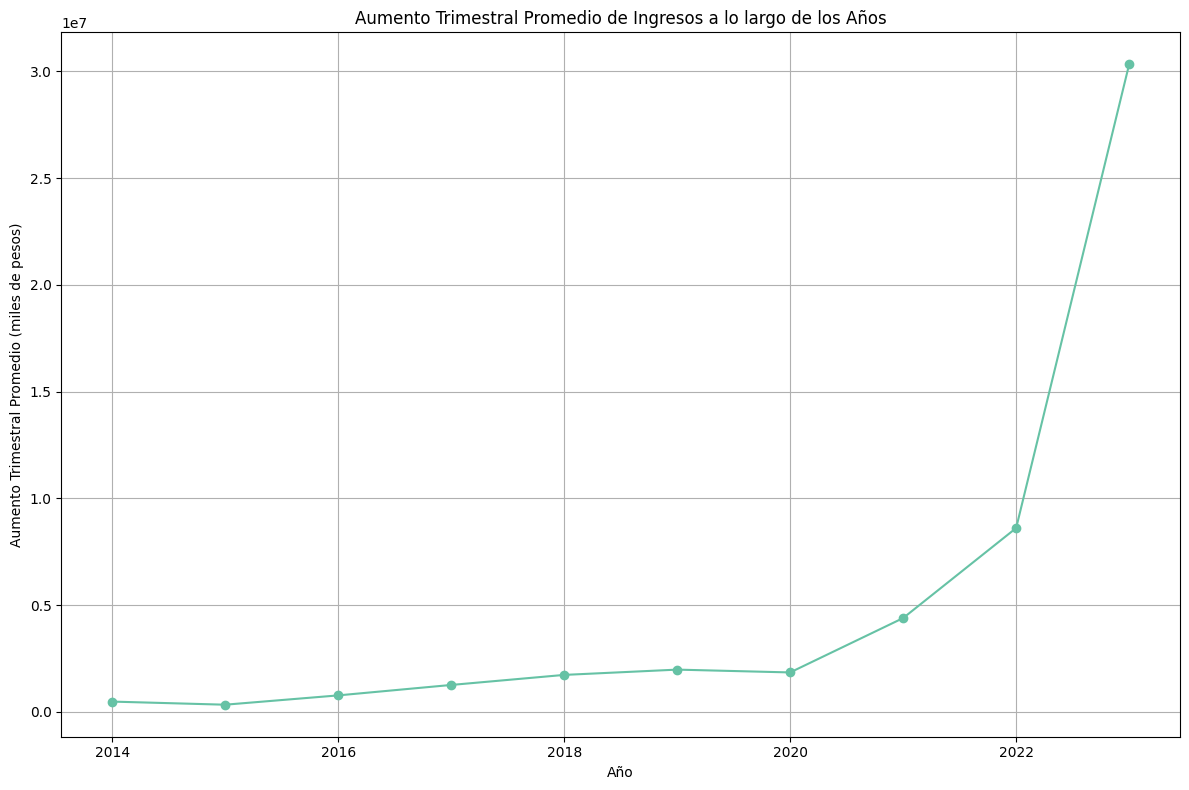

In [ ]:
# Vamos hacer una visualizacion del aumentro trimestral a lo largo de los años
# Ordenamos el DataFrame por año y trimestre para asegurar el orden correcto
df_kpi_ingresos.sort_values(by=['Año', 'Trimestre'], inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))

df_año = df_kpi_ingresos.groupby('Año')['Aumento_trimestral_en_base_al_anterior'].mean()

ax.plot(df_año.index, df_año.values, marker='o', linestyle='-')

ax.set_xlabel('Año')
ax.set_ylabel('Aumento Trimestral Promedio (miles de pesos)')
ax.set_title('Aumento Trimestral Promedio de Ingresos a lo largo de los Años')

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Vamos a exportar el df_kpi_ingresos para trabajar un script mas adelante:
## df_kpi_ingresos.to_csv('df_kpi_ingresos.csv', index=False)